In [1]:

import numpy as np
import pandas as pd


/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.groupby('Exited').size()

Exited
0    130113
1     34921
dtype: int64

In [5]:
import seaborn as sns

In [6]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [7]:
def drop_columns(df, columns):
    df = df.drop(columns=columns)
    return df

In [8]:
columns = ['id', 'CustomerId', 'Geography', 'Gender', 'Surname']
train_df = drop_columns(train_df, columns)
test_df = drop_columns(test_df, columns)

In [9]:
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<Axes: >

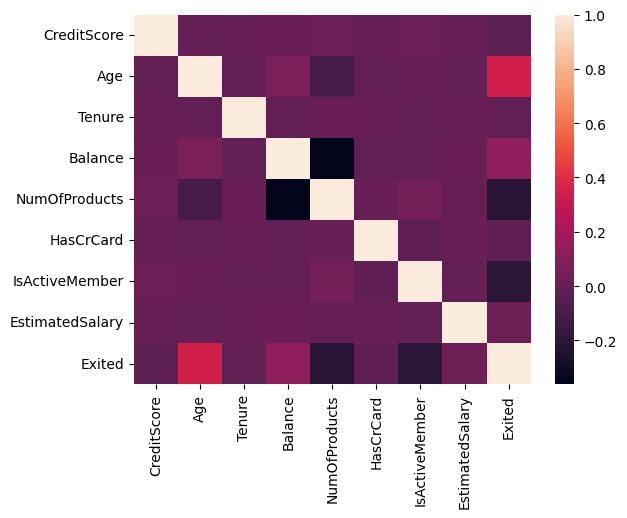

In [10]:
sns.heatmap(train_df.corr(method='pearson'))

In [11]:
train_df = drop_columns(train_df, ['NumOfProducts'])
test_df = drop_columns(test_df, ['NumOfProducts'])

<Axes: >

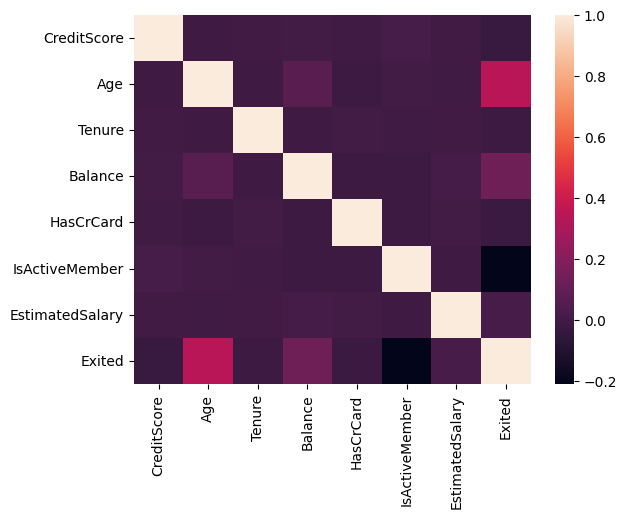

In [12]:
sns.heatmap(train_df.corr(method='pearson'))

In [13]:
X = train_df.drop('Exited', axis = 1).values
y = train_df.Exited.values
validation_size = 0.20
seed = 42
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = validation_size, random_state = seed, stratify=y)

## Evaluate Algorithms

In [14]:
num_folds = 10
scoring = 'roc_auc'

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.model_selection import StratifiedKFold

In [17]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
# pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC())])))

results = []
names = []

for name, model in pipelines:
    strat_kfold = StratifiedKFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring, cv=strat_kfold)
    results.append(cv_results)
    names.append(name)
    msg = f'{name}, {cv_results.mean()}, {cv_results.std()}'
    print(msg)

## Algorithm Tuning

### Tuning LDA

In [18]:
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_train)
param_grid = {'solver':['svd', 'lsqr'], 'shrinkage':[None] + [x / 10 for x in range(0, 11)] + ['auto']}
model = LinearDiscriminantAnalysis()
strat_kfold = StratifiedKFold(n_splits = num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=strat_kfold, scoring=scoring)
grid_results = grid.fit(rescaled_X, y_train)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
print(f'{grid_results.best_score_}, {grid_results.best_params_}')

## Ensemble Methods

In [21]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])))

results = []
names = []
for name, model in ensembles:a
    strat_kfold = StratifiedKFold(n_splits = num_folds, shuffle=True, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = strat_kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

## Tuning Ensemble Models

### Tuning Gradient Boosting Classifier

In [22]:
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_train)
estimators = np.arange(50, 300, 50)
param_grid = dict(n_estimators = estimators)
model = GradientBoostingClassifier()
strat_kfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = seed)
grid = GridSearchCV(model, param_grid = param_grid, cv = strat_kfold, scoring = scoring)
grid_results = grid.fit(rescaled_X, y_train)
print(grid_results.best_score_, grid_results.best_params_)

0.8084723052170821 {'n_estimators': 250}


## Finalize Model

In [23]:
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_train)
model = GradientBoostingClassifier(random_state = seed, n_estimators = 250)
model.fit(rescaled_X, y_train)

GradientBoostingClassifier(n_estimators=250, random_state=42)

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
rescaled_validation_X = scaler.transform(X_validation)
predictions = model.predict_proba(rescaled_validation_X)[:, 1]
print(roc_auc_score(y_validation, predictions))

0.8084718480158468


## Model for Competition

In [26]:
print(len(test_df))
rescaled_X_test_df = scaler.transform(test_df)
print(len(test_df))
predictions = model.predict_proba(rescaled_X_test_df)[:, 1]
print(predictions)
print(len(predictions))

110023
110023
[0.05802787 0.50747605 0.06929695 ... 0.07652683 0.03330494 0.13695732]
110023


In [27]:
test_df['Exited'] = predictions

In [28]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [29]:
submission['Exited'] = test_df['Exited']
submission.to_csv('submission.csv', index = False)
submission

,id,Exited
0,165034,0.058028
1,165035,0.507476
2,165036,0.069297
3,165037,0.094024
4,165038,0.251103
...,...,...
110018,275052,0.069394
110019,275053,0.081250
110020,275054,0.076527
110021,275055,0.033305
